In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data_analytics_lib as dal

In [2]:
x = [1.0,2.0,4.0,6.0,5.0,6.0,9.0,8.0,11.0,12.0]
y = [14.0,10.0,12.0,9.0,8.0,6.0,4.0,3.0,3.0,10.0]

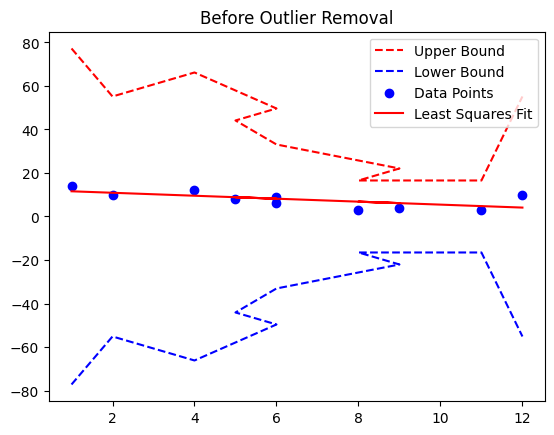

/var/folders/zl/1yvl8k952d78qdldsvvhkwkdyc7vfd/T/ipykernel_2516/697770617.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


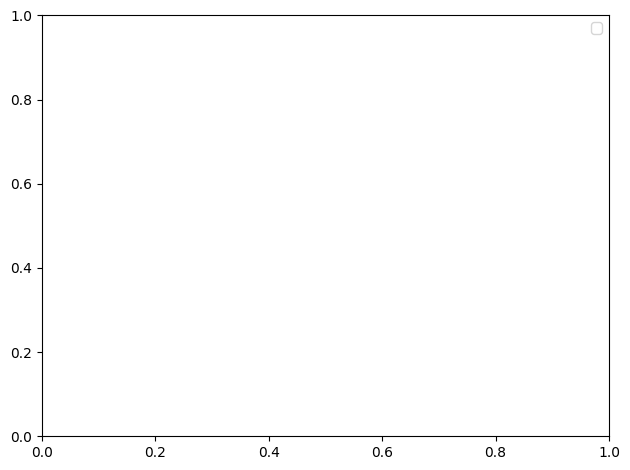

In [ ]:
def calculate_residuals(x_data, y_data, fit_type = 1):
    
    
    x_array = np.array(x_data)
    y_array = np.array(y_data)
    
    least_square_line_y_values = []
    
    fit_residual = []
    
    if fit_type == 1:
        least_squares_coefficients = dal.least_squares_coefficient(x_array, y_array)
        
        for x in x_array:
            least_square_line_y_values.append((least_squares_coefficients[0][0] * x) + least_squares_coefficients[0][1])
        
        for y in y_array:
            fit_residual.append(y - least_square_line_y_values[len(fit_residual)])
    
        residual_mean = np.mean(fit_residual)
        residual_std = np.std(fit_residual)
        
    return fit_residual, residual_mean, residual_std

def determine_outliers(residuals, mean, std_dev, n = 2):
    outlier_indices = []
    bound1 = mean + n * std_dev
    bound2 = mean - n * std_dev
    
    for i in range(len(residuals)):
        if residuals[i] > bound1 or residuals[i] < bound2:
            outlier_indices.append(i)
    
    return outlier_indices, 

def remove_outliers(x_data, y_data, outlier_indices):
    x_cleaned = []
    y_cleaned = []
    
    for i in range(len(x_data)):
        if i not in outlier_indices:
            x_cleaned.append(x_data[i])
            y_cleaned.append(y_data[i])
    
    return x_cleaned, y_cleaned

residual_data, mean_of_residual, residual_standard_dev = calculate_residuals(x, y)
outliers = determine_outliers(residual_data, mean_of_residual, residual_standard_dev, n = 2)


plt.plot(x, upper_bound, color='red', linestyle='dashed', label='Upper Bound')
plt.plot(x, lower_bound, color='blue', linestyle='dashed', label='Lower Bound')

dal.graph__least_squares(x, y, title = "Before Outlier Removal")

plt.legend()
plt.tight_layout()
plt.show()



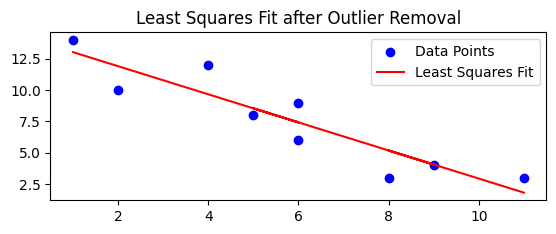

In [12]:
new_x, new_y = remove_outliers(x, y, outliers)

plt.subplot(2,1,1)
dal.graph__least_squares(new_x, new_y, title = "Least Squares Fit after Outlier Removal")